## Importing the necessary modules

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Setting working directory

In [2]:
os.chdir('/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files')
os.getcwd() # Prints the current working directory

'/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files'

## Connecting to coursework_py database

In [3]:
conn = sqlite3.connect('/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files/coursework_py.db')

## Data Wrangling

In [4]:
c = conn.cursor()

### Exploring the ages of planes to identify anomalies, if any

In [5]:
pd.read_sql_query("""
                  SELECT year AS Year 
                  FROM planes 
                  WHERE year > 0 
                  ORDER BY year ASC LIMIT 5
                  """, conn) # There are anomalies (Years with value of 0), and the oldest plane was manufactured in 1946

,Year
0,0000
1,0000
2,0000
3,1946
4,1956


In [6]:
age_anomalies_1 = pd.read_sql_query("""
                                    SELECT planes.year AS year_manufactured, ontime.year AS year_flown, (ontime.year - planes.year) AS plane_age 
                                    FROM ontime 
                                    INNER JOIN planes ON ontime.TailNum = planes.tailnum 
                                    WHERE plane_age < 0 
                                    ORDER BY plane_age
                                    """, conn) 

In [7]:
age_anomalies_1.describe() # There were planes with negative age, e.g. -1 & -2

,year_flown,plane_age
count,3739.000000,3739.000000
mean,2005.485959,-1.514041
std,0.499870,0.499870
min,2005.000000,-2.000000
25%,2005.000000,-2.000000
50%,2005.000000,-2.000000
75%,2006.000000,-1.000000
max,2006.000000,-1.000000


In [8]:
age_anomalies_2 = pd.read_sql_query("""
                                    SELECT planes.year AS year_manufactured, ontime.year AS year_flown, (ontime.year - planes.year) AS plane_age
                                    FROM ontime
                                    INNER JOIN planes ON ontime.TailNum = planes.tailnum
                                    WHERE plane_age > 0
                                    ORDER BY plane_age DESC
                                    """, conn)

In [9]:
display(age_anomalies_2.head()) # Oldest plane age was 2007, which is impossible

,year_manufactured,year_flown,plane_age
0,None,2007,2007
1,None,2007,2007
2,None,2007,2007
3,None,2007,2007
4,None,2007,2007


In [10]:
check_year_manufactured = pd.read_sql_query("""
                                            SELECT planes.year AS year_manufactured, ontime.year AS year_flown, (ontime.year - planes.year) AS plane_age
                                            FROM ontime
                                            INNER JOIN planes ON ontime.TailNum = planes.tailnum
                                            WHERE plane_age >= 0 AND plane_age < 200
                                            ORDER BY year_manufactured ASC
                                            """, conn) # Oldest plane still in operation was manufactured in 1956

In [11]:
display(check_year_manufactured.head())

,year_manufactured,year_flown,plane_age
0,1956,2005,49
1,1956,2005,49
2,1956,2005,49
3,1956,2005,49
4,1956,2005,49


Moving forward, queries will only select planes with the age of 0 to 51, since the oldest plane still in operation was manufactured in 1956, meaning that the age of the oldest plane is 51 years old as the dataset only contain flights from 2005 to 2007 to filter out the anomalies identified.

## Q2. Do older planes suffer more delays?


### Part 1: Calculating the age of the planes and dealing with anomalies in data set

In [12]:
# Calculating the average arrival delays for each plane age, filtering out the anomalies identified previously
q2 = pd.read_sql_query("""
                       SELECT (ontime.year - planes.year) AS plane_age, AVG(ArrDelay) AS AvgArrDelay, COUNT(*) AS NumOfFlights
                       FROM ontime
                       INNER JOIN planes ON ontime.TailNum = planes.tailnum
                       WHERE plane_age >= 0 AND plane_age <= 51
                       GROUP BY plane_age
                       ORDER BY plane_age
                       """, conn)

In [13]:
# Changing the column names of q2
q2.columns = ["Age of Planes", "Average Arrival Delay", "Number of Flights"]

# Printing the output of q2
display(q2)

,Age of Planes,Average Arrival Delay,Number of Flights
0,0,8.583980,290713
1,1,8.580599,788587
2,2,8.311559,1029003
3,3,8.848945,1246479
4,4,9.144551,1396992
5,5,8.888549,1384136
6,6,8.417615,1353145
7,7,8.760684,1215453
8,8,9.536994,941013
9,9,9.337987,704253


#### Distribution of Number of Flights by Age of Planes


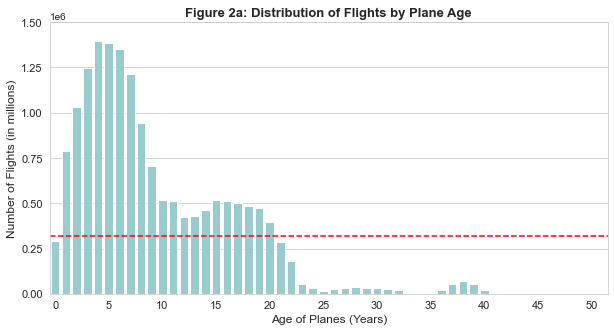

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x="Age of Planes", y="Number of Flights", data=q2, color="#90d2d8")
plt.title("Figure 2a: Distribution of Flights by Plane Age", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Number of Flights (in millions)", fontsize=12)
plt.xticks(np.arange(0, 55, 5), fontsize=11) 
plt.yticks(range(0, 1750000, 250000), fontsize=11)
plt.axhline(y=q2["Number of Flights"].mean(), color="red", linestyle="dashed")
plt.ylim(0, 1500000)
plt.show()

#### Scatter plot of the average delay time by plane age

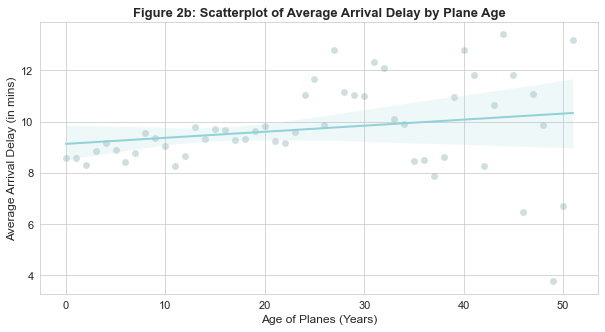

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age of Planes", y="Average Arrival Delay", data=q2, alpha=0.3, s=50, color="#649397")
sns.regplot(x="Age of Planes", y="Average Arrival Delay", data=q2, scatter=False, line_kws={"linewidth":2, "color":"#90D2D8"})
plt.title("Figure 2b: Scatterplot of Average Arrival Delay by Plane Age", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Average Arrival Delay (in mins)", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Calculating the percentage of delayed flights (Overall)

In [16]:
q2_delayed_perc = pd.read_sql_query("""
                        SELECT (ontime.year - planes.year) AS plane_age, 
                            COUNT(*) AS NumOfFlights,
                            SUM(CASE WHEN ontime.ArrDelay > 0 THEN 1 ELSE 0 END) AS NumDelayedFlights,
                            ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100) AS delayed_percentage
                        FROM ontime INNER JOIN planes ON ontime.TailNum = planes.tailnum
                        WHERE plane_age >= 0 AND plane_age <= 51
                        GROUP BY plane_age
                        ORDER BY plane_age
                       """, conn)

In [17]:
# Changing the column names of q2_delayed_perc
q2_delayed_perc.columns = ["Age of Planes", "Number of Flights", "Number of Delayed Flights", "Delayed Percentage"]

# Printing the output of q2_delayed_perc
display(q2_delayed_perc)

,Age of Planes,Number of Flights,Number of Delayed Flights,Delayed Percentage
0,0,290713,131526,45.242559
1,1,788587,356320,45.184615
2,2,1029003,460273,44.729996
3,3,1246479,564211,45.264381
4,4,1396992,636977,45.596324
5,5,1384136,626429,45.257764
6,6,1353145,606450,44.817813
7,7,1215453,552295,45.439437
8,8,941013,435157,46.243463
9,9,704253,320215,45.468745


#### Scatterplot of percentage of delayed flights by plane age (Overall)

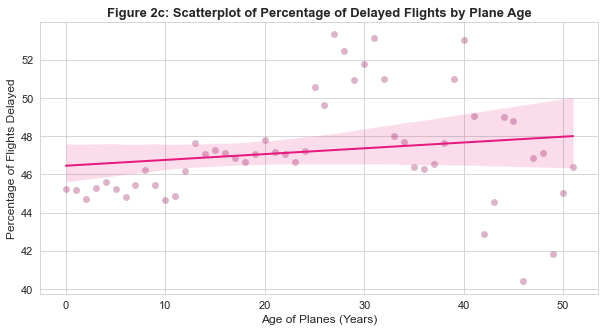

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age of Planes", y="Delayed Percentage", data=q2_delayed_perc, alpha=0.3, s=50, color="#8B044E")
sns.regplot(x="Age of Planes", y="Delayed Percentage", data=q2_delayed_perc, scatter=False, line_kws={"linewidth":2, "color":"#e7197e"})
plt.title("Figure 2c: Scatterplot of Percentage of Delayed Flights by Plane Age", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Percentage of Flights Delayed", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Part 2: Segment the newer planes into one group (Newer planes: <= 22 years)

In [19]:
# Selecting only flights with planes aged 22 or younger
q2_newer_planes = pd.read_sql_query("""
                                  SELECT (ontime.year - planes.year) AS plane_age, AVG(ArrDelay) AS AvgArrDelay, COUNT(*) AS NumOfFlights
                                  FROM ontime
                                  INNER JOIN planes ON ontime.TailNum = planes.tailnum
                                  WHERE plane_age >=0 AND plane_age <= 22
                                  GROUP BY plane_age
                                  ORDER BY plane_age
                                  """, conn)

In [20]:
# Changing the column names of q2_newer_planes
q2_newer_planes.columns = ["Age of Planes", "Average Arrival Delay", "Number of Flights"]

# Printing the output of q2_newer_planes
display(q2_newer_planes)

# Verifying the total number of flights
q2_newer_planes['Number of Flights'].sum() # 16,050,236 flights (meaning there should only be 579,786 flights > 22 y/o)


,Age of Planes,Average Arrival Delay,Number of Flights
0,0,8.583980,290713
1,1,8.580599,788587
2,2,8.311559,1029003
3,3,8.848945,1246479
4,4,9.144551,1396992
5,5,8.888549,1384136
6,6,8.417615,1353145
7,7,8.760684,1215453
8,8,9.536994,941013
9,9,9.337987,704253


16050236

#### Scatterplot of percentage of delayed flights by plane age (Newer planes)

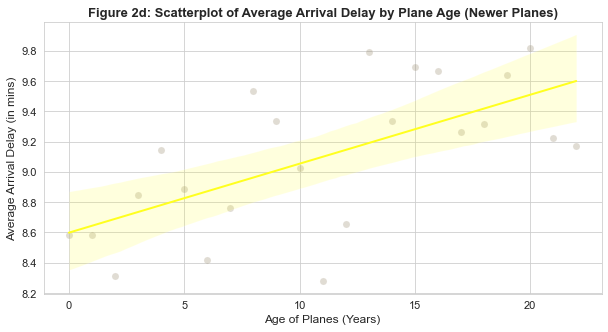

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age of Planes", y="Average Arrival Delay", data=q2_newer_planes, alpha=0.3, s=50, color="#998d6e")
sns.regplot(x="Age of Planes", y="Average Arrival Delay", data=q2_newer_planes, scatter=False, line_kws={"linewidth":2, "color":"#ffff1f"})
plt.title("Figure 2d: Scatterplot of Average Arrival Delay by Plane Age (Newer Planes)", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Average Arrival Delay (in mins)", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Calculating the percentage of delayed flights (Newer planes)

In [22]:
# Selecting only flights with planes aged 22 or younger
q2_newer_delayed_perc = pd.read_sql_query("""
    SELECT (ontime.year - planes.year) AS plane_age, 
        SUM(CASE WHEN ontime.ArrDelay > 0 THEN 1 ELSE 0 END) AS NumDelayedFlights,
        COUNT(*) AS NumOfFlights,
        ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100) AS delayed_percentage
    FROM ontime INNER JOIN planes ON ontime.TailNum = planes.tailnum
    WHERE plane_age >= 0 AND plane_age <= 22
    GROUP BY plane_age
    ORDER BY plane_age
    """, conn)

In [23]:
# Changing the column names of q2_newer_delayed_perc
q2_newer_delayed_perc.columns = ["Age of Planes", "Number of Delayed Flights", "Number of Flights", "Delayed Percentage"]

# Printing the output of q2_newer_delayed_perc
display(q2_newer_delayed_perc)

,Age of Planes,Number of Delayed Flights,Number of Flights,Delayed Percentage
0,0,131526,290713,45.242559
1,1,356320,788587,45.184615
2,2,460273,1029003,44.729996
3,3,564211,1246479,45.264381
4,4,636977,1396992,45.596324
5,5,626429,1384136,45.257764
6,6,606450,1353145,44.817813
7,7,552295,1215453,45.439437
8,8,435157,941013,46.243463
9,9,320215,704253,45.468745


#### Scatterplot of percentage of delayed flights by plane age (Newer planes)

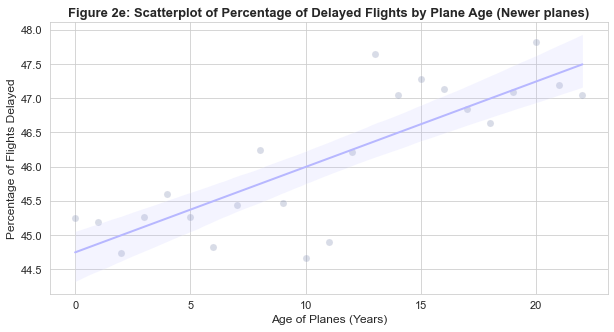

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age of Planes", y="Delayed Percentage", data=q2_newer_delayed_perc, alpha=0.3, s=50, color="#808eb2")
sns.regplot(x="Age of Planes", y="Delayed Percentage", data=q2_newer_delayed_perc, scatter=False, line_kws={"linewidth":2, "color":"#b7b7ff"})
plt.title("Figure 2e: Scatterplot of Percentage of Delayed Flights by Plane Age (Newer planes)", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Percentage of Flights Delayed", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Part 3: Segment the older planes into one group (Older planes: > 22 years)


In [25]:
# Selecting only flights with planes older than 22 years
q2_older_planes = pd.read_sql_query("""
                                    SELECT (ontime.year - planes.year) AS plane_age, AVG(ArrDelay) AS AvgArrDelay, COUNT(*) AS NumOfFlights
                                    FROM ontime
                                    INNER JOIN planes ON ontime.TailNum = planes.tailnum
                                    WHERE plane_age > 22
                                    GROUP BY plane_age
                                    ORDER BY plane_age
                                    """, conn)

In [26]:
# Changing the column names of q2_older_planes 
q2_older_planes.columns = ["Age of Planes", "Average Arrival Delay", "Number of Flights"]

# Printing the output of q2_older_planes 
display(q2_older_planes)

# Verifying the total number of flights
q2_older_planes['Number of Flights'].sum() # 579,786 flights > 22 y/o

,Age of Planes,Average Arrival Delay,Number of Flights
0,23,9.602054,54759
1,24,11.026407,29558
2,25,11.649053,17256
3,26,9.854504,25647
4,27,12.782913,34766
5,28,11.166282,34976
6,29,11.024835,33889
7,30,11.012630,31966
8,31,12.309926,26872
9,32,12.092106,18703


1081855

#### Scatterplot of average arrival delay by plane age (Older planes)

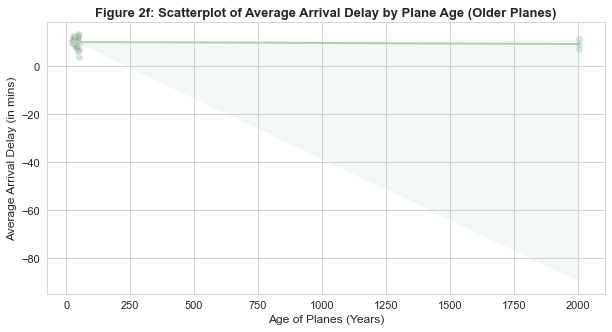

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age of Planes", y="Average Arrival Delay", data=q2_older_planes, alpha=0.3, s=50, color="#87aa8e")
sns.regplot(x="Age of Planes", y="Average Arrival Delay", data=q2_older_planes, scatter=False, color="#BC066A", line_kws={"linewidth":2, "color":"#a9d5b2"})
plt.title("Figure 2f: Scatterplot of Average Arrival Delay by Plane Age (Older Planes)", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Average Arrival Delay (in mins)", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Calculating the percentage of delayed flights for older planes

In [28]:
q2_older_delayed_perc = pd.read_sql_query("""
                                          SELECT (ontime.year - planes.year) AS plane_age, 
                                            SUM(CASE WHEN ontime.ArrDelay > 0 THEN 1 ELSE 0 END) AS NumDelayedFlights,
                                             COUNT(*) AS NumOfFlights,
                                             ((CAST(SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS FLOAT)/CAST(COUNT(*) AS FLOAT))*100) AS delayed_percentage
                                          FROM ontime INNER JOIN planes ON ontime.TailNum = planes.tailnum
                                          WHERE plane_age >= 0 AND plane_age > 22
                                          GROUP BY plane_age
                                          ORDER BY plane_age
                                          """, conn)

In [29]:
# Changing the column names of q2_older_planes 
q2_older_delayed_perc.columns = ["Age of Planes", "Number of Delayed Flights", "Number of Flights", "Delayed Percentage"]

# Printing the output of q2_older_delayed_perc
display(q2_older_delayed_perc)

# Checking the number of delayed flights
q2_older_delayed_perc['Number of Delayed Flights'].sum() # 286,362 delayed flights

,Age of Planes,Number of Delayed Flights,Number of Flights,Delayed Percentage
0,23,25544,54759,46.648040
1,24,13955,29558,47.212261
2,25,8731,17256,50.596894
3,26,12729,25647,49.631536
4,27,18542,34766,53.333717
5,28,18350,34976,52.464547
6,29,17264,33889,50.942784
7,30,16558,31966,51.798786
8,31,14275,26872,53.122209
9,32,9535,18703,50.981126


514002

#### Scatterplot of percentage of delayed flights by plane age (Older planes)

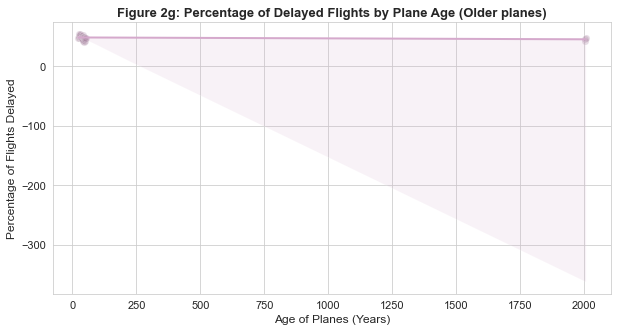

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age of Planes", y="Delayed Percentage", data=q2_older_delayed_perc, alpha=0.3, s=50, color="#aa87a3")
sns.regplot(x="Age of Planes", y="Delayed Percentage", data=q2_older_delayed_perc, scatter=False, color="#BC066A", line_kws={"linewidth":2, "color":"#d5a9cc"})
plt.title("Figure 2g: Percentage of Delayed Flights by Plane Age (Older planes)", fontsize=13, fontweight="bold")
plt.xlabel("Age of Planes (Years)", fontsize=12)
plt.ylabel("Percentage of Flights Delayed", fontsize=12)
plt.xticks(rotation=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

## Close the database connection

In [31]:
conn.close()